In [130]:
!pip3 install haversine 



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip


In [131]:
#Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.image as mpimg
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
from haversine import haversine_vector, Unit

In [132]:
df_nyc = pd.read_csv('/Users/dhruvgulwani/Downloads/archive-2/AB_US_2023.csv')

df_nyc.head()

/var/folders/xd/zq_tv_dx6w9dpddcthd38hr00000gn/T/ipykernel_9019/2461421350.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nyc = pd.read_csv('/Users/dhruvgulwani/Downloads/archive-2/AB_US_2023.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [133]:
df_nyc.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.321470e+05,2.321470e+05,232147.000000,232147.000000,232147.000000,232147.000000,232147.000000,183062.000000,232147.000000,232147.000000,232147.000000
mean,2.584580e+17,1.582248e+08,36.610585,-98.301436,259.468001,13.495867,40.915230,1.638348,29.879055,180.985686,11.689701
std,3.465985e+17,1.587164e+08,5.126523,19.706929,1024.645918,27.920631,80.649152,1.910812,106.013665,134.715299,20.599954
min,6.000000e+00,2.300000e+01,25.957323,-123.089130,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.638896e+07,2.299242e+07,33.976225,-118.315111,91.000000,2.000000,1.000000,0.310000,1.000000,52.000000,0.000000
50%,4.896307e+07,1.005783e+08,36.190556,-97.727670,149.000000,3.000000,9.000000,1.000000,2.000000,175.000000,3.000000
75%,6.633014e+17,2.686930e+08,40.717440,-77.026222,250.000000,30.000000,43.000000,2.420000,10.000000,321.000000,16.000000
max,8.581014e+17,5.069384e+08,47.734010,-70.996000,100000.000000,1250.000000,3091.000000,101.420000,1003.000000,365.000000,1314.000000


In [134]:
len(df_nyc)

232147

In [135]:
df_nyc.isnull().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

In [136]:
df_nyc.drop(['last_review'],axis=1,inplace=True)

In [137]:
df_nyc.fillna({'review_per_month':0},inplace=True)
df_nyc.fillna({'neighbourhood_group':0},inplace=True)



In [191]:
df_nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
city                              0
dtype: int64

In [139]:
df_nyc.fillna({'reviews_per_month':0},inplace=True)


In [140]:
df_nyc.isnull().sum()


id                                 0
name                              16
host_id                            0
host_name                         13
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
city                               0
dtype: int64

In [141]:
df_nyc.dropna(inplace=True)
df_nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
city                              0
dtype: int64

In [142]:
print(df_nyc.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'city'],
      dtype='object')


In [143]:
pd.unique(df_nyc['neighbourhood_group'])

array([0, 'Other Cities', 'Unincorporated Areas', 'City of Los Angeles',
       'Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island',
       'Providence', 'Washington', 'Newport', 'Bristol', 'Kent',
       'Central Area', 'Other neighborhoods', 'Delridge', 'Magnolia',
       'Beacon Hill', 'West Seattle', 'Ballard', 'Queen Anne',
       'Capitol Hill', 'Downtown', 'Cascade', 'Rainier Valley',
       'Northgate', 'Lake City', 'University District', 'Seward Park',
       'Interbay'], dtype=object)

In [144]:
df_nyc=df_nyc.replace('Manhatten','Manhattan')

In [145]:
pd.unique(df_nyc['room_type'])

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [146]:
df_nyc['price'].describe()

count    232118.000000
mean        259.460481
std        1024.683592
min           0.000000
25%          91.000000
50%         149.000000
75%         250.000000
max      100000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Top 10 neighbour Unclean')

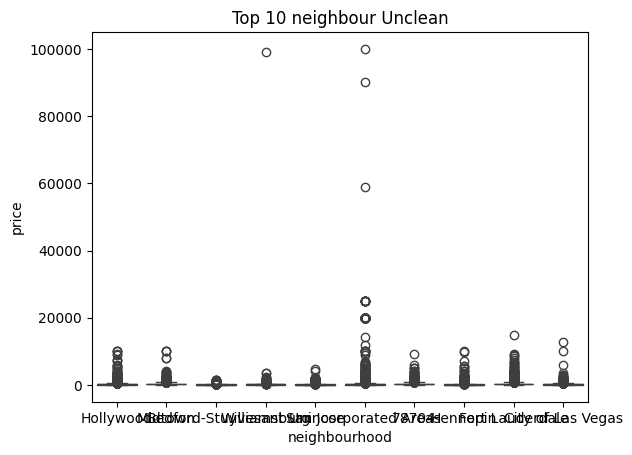

In [147]:
top_neighbour = df_nyc.neighbourhood.value_counts().head(10).index

#df_neighbour = df_nyc[df_nyc['neighbourhood'].isin(top_neighbour)]

df_neighbour_price = df_nyc[df_nyc['neighbourhood'].isin(top_neighbour)][['price','neighbourhood']]

sns.boxplot( data=df_neighbour_price, x='neighbourhood', y='price').set_title('Top 10 neighbour Unclean')


In [148]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_drop=df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_drop

In [149]:
neighbourhood = df_nyc['neighbourhood'].unique()

In [150]:
outlier_index = []

In [151]:
for i in range (len(neighbourhood)):
    df_outlier=remove_outlier_IQR(df_nyc[df_nyc['neighbourhood']==neighbourhood[i]].price)
    outlier_index.extend(df_outlier.index)

In [152]:
len(outlier_index)

17822

In [153]:
df_nyc_clean=df_nyc.drop(outlier_index)

Text(0.5, 1.0, 'cleaned without outliers')

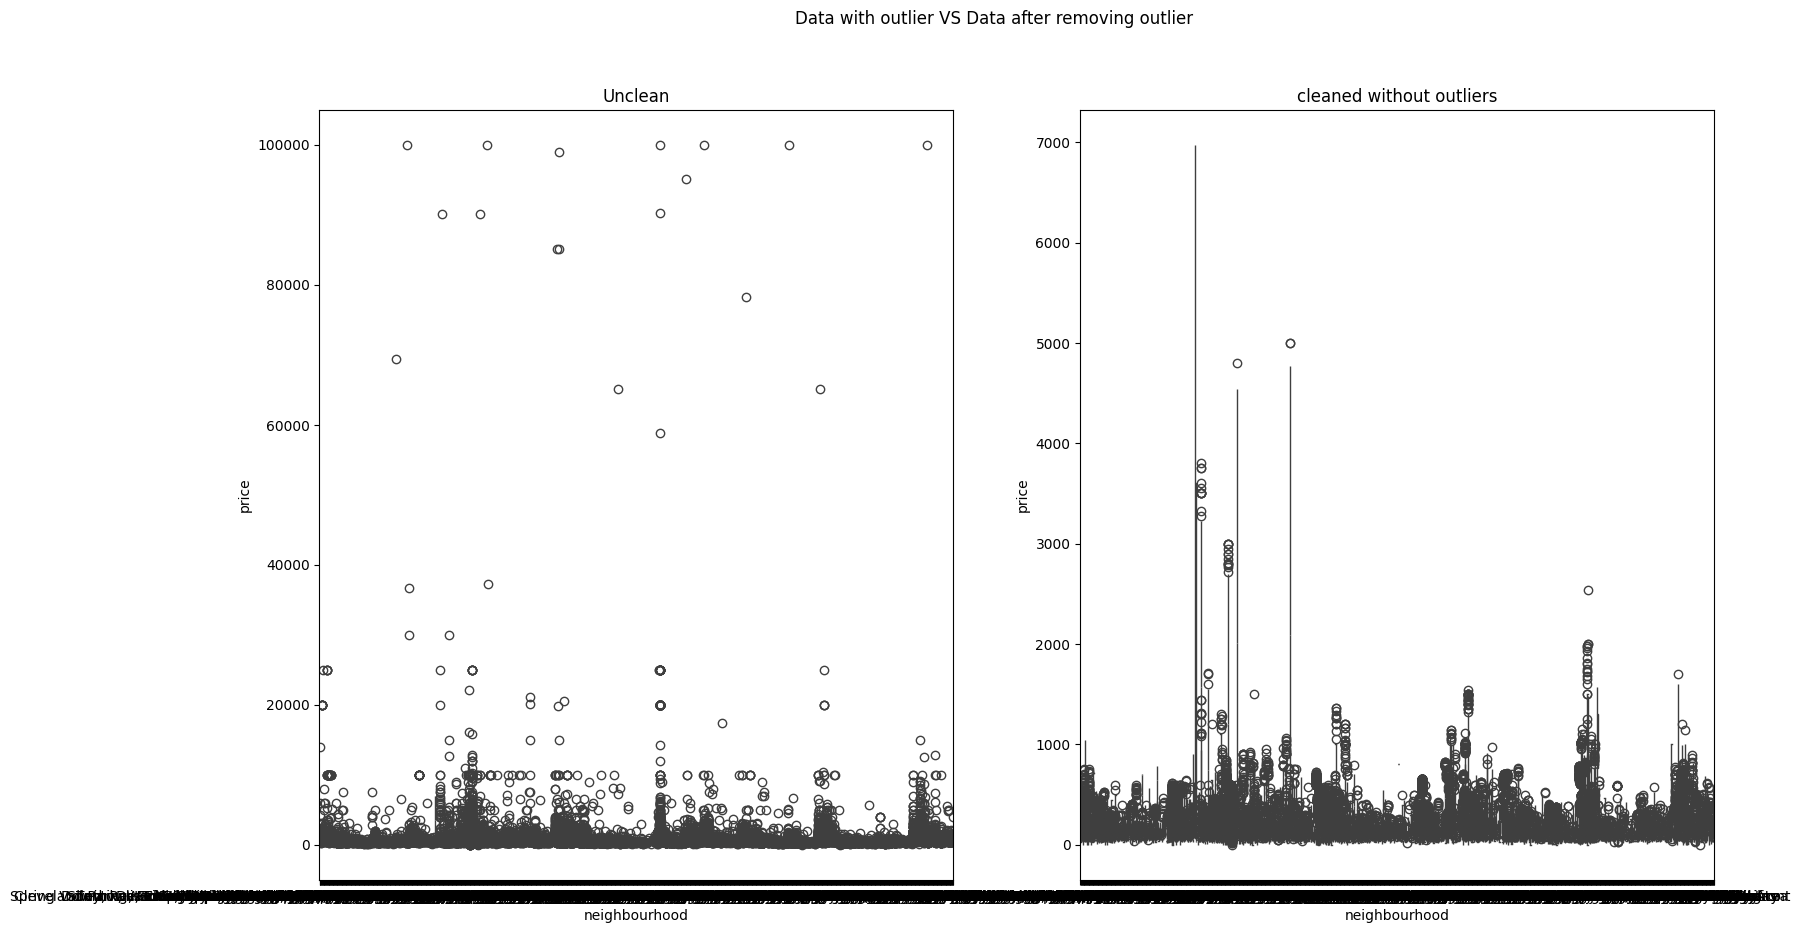

In [154]:

df_neighbour_price_clean = df_nyc_clean[['price','neighbourhood']]
df_neighbour_price = df_nyc[['price','neighbourhood']]

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

fig.suptitle('Data with outlier VS Data after removing outlier')

sns.boxplot(ax=axes[0], data=df_neighbour_price, x='neighbourhood', y='price').set_title('Unclean')
sns.boxplot(ax=axes[1], data=df_neighbour_price_clean, x='neighbourhood', y='price').set_title('cleaned without outliers')


Text(0.5, 1.0, 'Top 10 neighbour clean')

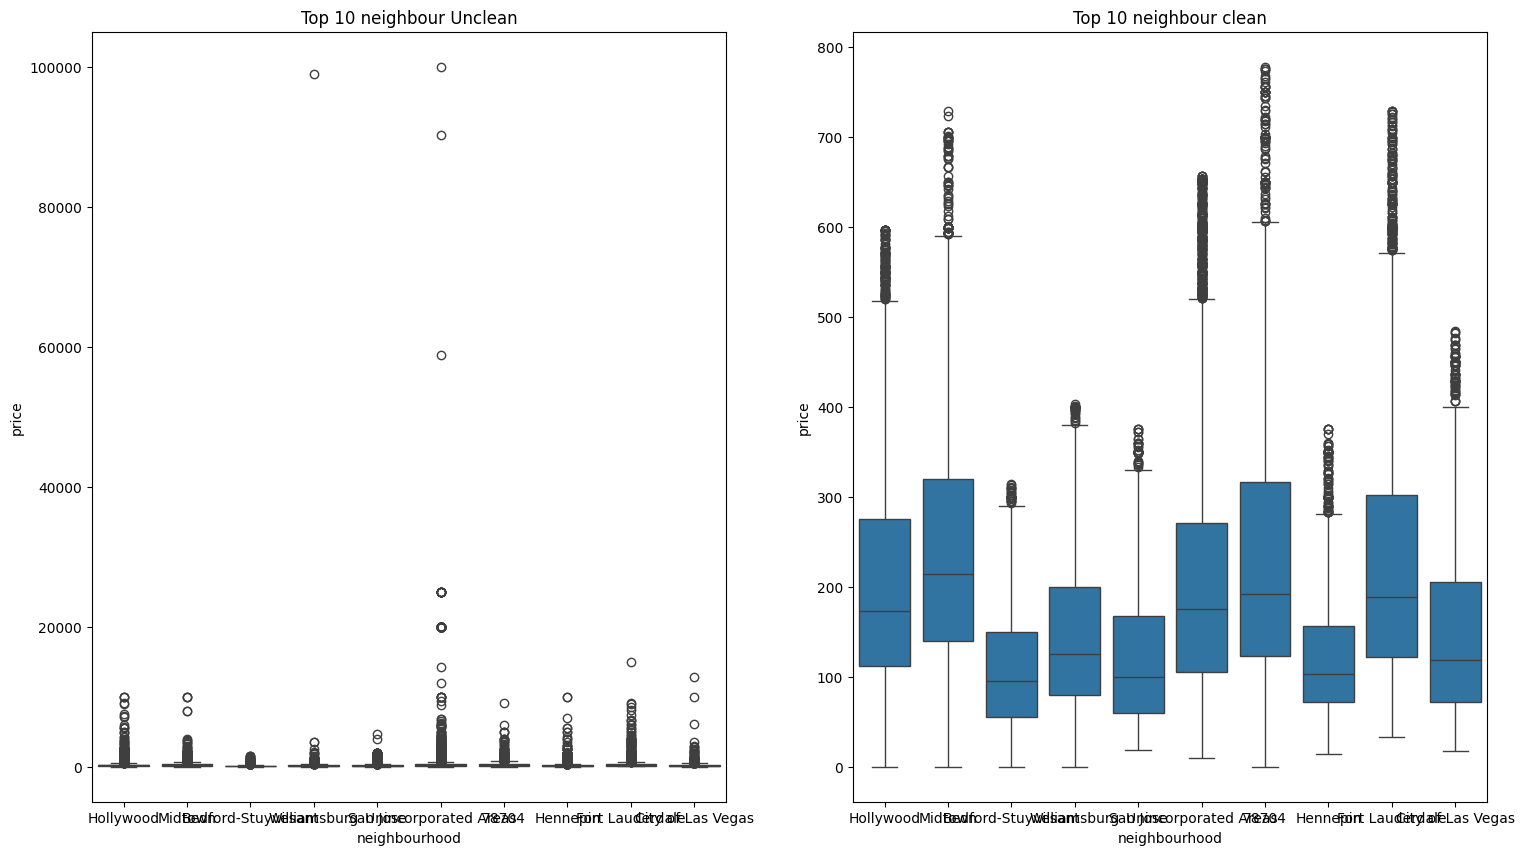

In [155]:
top_neighbour = df_nyc.neighbourhood.value_counts().head(10).index

#df_neighbour = df_nyc[df_nyc['neighbourhood'].isin(top_neighbour)]

df_neighbour_price_clean = df_nyc_clean[df_nyc_clean['neighbourhood'].isin(top_neighbour)][['price','neighbourhood']]
df_neighbour_price = df_nyc[df_nyc['neighbourhood'].isin(top_neighbour)][['price','neighbourhood']]

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.boxplot(ax=axes[0], data=df_neighbour_price, x='neighbourhood', y='price').set_title('Top 10 neighbour Unclean')
sns.boxplot(ax=axes[1], data=df_neighbour_price_clean, x='neighbourhood', y='price').set_title('Top 10 neighbour clean')


In [156]:
top_host=df_nyc_clean.host_id.value_counts().head(20)
top_host

host_id
107434423    4236
144214204     901
48005494      901
401130632     597
263502162     592
442029804     472
3223938       394
496944100     372
297860058     295
389697794     275
30283594      263
20234196      258
305240193     226
174792040     223
19303369      207
18273973      196
22541573      195
200239515     192
249975084     191
126644161     178
Name: count, dtype: int64

In [157]:
df_nyc['neighbourhood_group'].value_counts()

neighbourhood_group
0                       135639
City of Los Angeles      22202
Manhattan                17650
Other Cities             16373
Brooklyn                 16230
Queens                    6916
Unincorporated Areas      3872
Newport                   1749
Bronx                     1689
Washington                1526
Other neighborhoods       1292
Providence                1165
Downtown                   831
Capitol Hill               552
Central Area               543
Queen Anne                 438
Staten Island              429
West Seattle               423
Ballard                    375
Rainier Valley             368
Cascade                    311
Beacon Hill                287
University District        244
Northgate                  227
Delridge                   192
Bristol                    175
Kent                       127
Lake City                  107
Magnolia                    95
Seward Park                 49
Interbay                    42
Name: count, dtype:

In [158]:
neighbourhood_price=pd.pivot_table(df_nyc_clean,values='price',index='neighbourhood',aggfunc='mean')
neighbourhood_price.sort_values('price', ascending=False)



,price
neighbourhood,
New Aurora - English Turn,2424.333333
Bel-Air,1394.066667
Beverly Crest,1273.159091
Malibu,1108.851282
78712,1035.000000
...,...
Calumet Heights,42.166667
Desert View Highlands,41.000000
New Dorp,40.000000


Text(0, 0.5, 'Price')

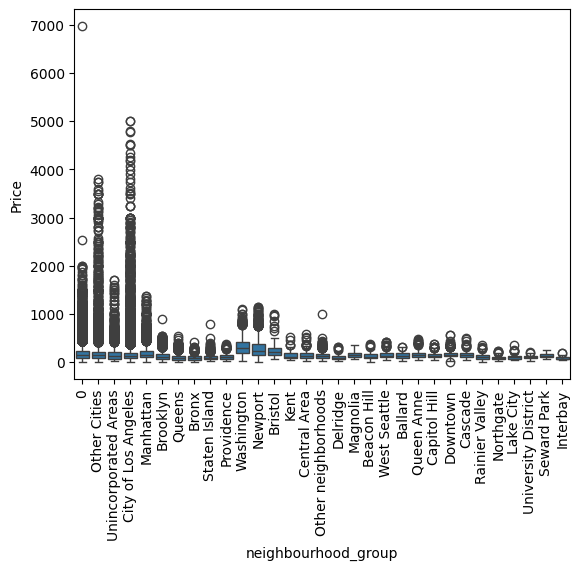

In [159]:
df_neighbourhood_price=df_nyc_clean[['price','neighbourhood_group']]
sns.boxplot(y='price',x='neighbourhood_group',data=df_neighbourhood_price)
plt.xticks(rotation=90)
plt.ylabel('Price')

In [160]:
df_nyc_clean.neighbourhood.value_counts().head(20)

neighbourhood
Unincorporated Areas    10686
Hollywood                5550
Fort Lauderdale          3925
Bedford-Stuyvesant       2923
San Jose                 2648
Williamsburg             2464
Midtown                  2434
Hennepin                 2268
City of Las Vegas        2089
78704                    2053
Harlem                   1894
District 19              1832
Mission Bay              1744
Sherman Oaks             1741
Bushwick                 1710
East Village             1688
Downtown                 1659
78702                    1564
Hallandale Beach         1529
Pompano Beach            1506
Name: count, dtype: int64

In [161]:
df_nyc_clean.groupby(['neighbourhood_group'])['neighbourhood'].nunique().sort_values(ascending=False)

neighbourhood_group
0                       845
City of Los Angeles     113
Other Cities             86
Unincorporated Areas     66
Queens                   51
Bronx                    49
Brooklyn                 48
Staten Island            43
Manhattan                32
Other neighborhoods      20
Providence               15
Washington                9
West Seattle              8
Downtown                  7
Rainier Valley            6
Newport                   6
Delridge                  6
Central Area              6
Kent                      5
Ballard                   5
Capitol Hill              5
Lake City                 5
Beacon Hill               4
Queen Anne                4
Northgate                 4
Cascade                   3
Bristol                   3
Magnolia                  3
Seward Park               1
University District       1
Interbay                  1
Name: neighbourhood, dtype: int64

In [162]:
df_nyc.fillna({'neighbourhood_group':0},inplace=True)

In [163]:
df_nyc_clean.groupby(['neighbourhood_group'])['neighbourhood'].nunique().sort_values(ascending=False)

neighbourhood_group
0                       845
City of Los Angeles     113
Other Cities             86
Unincorporated Areas     66
Queens                   51
Bronx                    49
Brooklyn                 48
Staten Island            43
Manhattan                32
Other neighborhoods      20
Providence               15
Washington                9
West Seattle              8
Downtown                  7
Rainier Valley            6
Newport                   6
Delridge                  6
Central Area              6
Kent                      5
Ballard                   5
Capitol Hill              5
Lake City                 5
Beacon Hill               4
Queen Anne                4
Northgate                 4
Cascade                   3
Bristol                   3
Magnolia                  3
Seward Park               1
University District       1
Interbay                  1
Name: neighbourhood, dtype: int64

In [164]:
df_nyc.fillna({'neigbhourhood_group':0},inplace=True)


In [165]:
df_nyc.fillna({'neighbourhood_group':0},inplace=True)


In [166]:
df_nyc_clean.groupby(['neighbourhood_group'])['neighbourhood'].nunique().sort_values(ascending=False)

neighbourhood_group
0                       845
City of Los Angeles     113
Other Cities             86
Unincorporated Areas     66
Queens                   51
Bronx                    49
Brooklyn                 48
Staten Island            43
Manhattan                32
Other neighborhoods      20
Providence               15
Washington                9
West Seattle              8
Downtown                  7
Rainier Valley            6
Newport                   6
Delridge                  6
Central Area              6
Kent                      5
Ballard                   5
Capitol Hill              5
Lake City                 5
Beacon Hill               4
Queen Anne                4
Northgate                 4
Cascade                   3
Bristol                   3
Magnolia                  3
Seward Park               1
University District       1
Interbay                  1
Name: neighbourhood, dtype: int64

In [167]:
df_nyc_clean = df_nyc_clean[df_nyc_clean['neighbourhood_group'] != 0]



In [168]:
df_nyc_clean.groupby(['neighbourhood_group'])['neighbourhood'].nunique().sort_values(ascending=False)

neighbourhood_group
City of Los Angeles     113
Other Cities             86
Unincorporated Areas     66
Queens                   51
Bronx                    49
Brooklyn                 48
Staten Island            43
Manhattan                32
Other neighborhoods      20
Providence               15
Washington                9
West Seattle              8
Downtown                  7
Delridge                  6
Rainier Valley            6
Newport                   6
Central Area              6
Kent                      5
Capitol Hill              5
Lake City                 5
Ballard                   5
Northgate                 4
Beacon Hill               4
Queen Anne                4
Cascade                   3
Magnolia                  3
Bristol                   3
Interbay                  1
Seward Park               1
University District       1
Name: neighbourhood, dtype: int64

In [169]:
#NEIGBHOURHOOD VS PRICE 

neighbourhood_price


,price
neighbourhood,
28704,140.475962
28715,130.071429
28732,142.480000
28801,183.091615
28803,140.795673
...,...
Woodstock,105.106061
Woonsocket,70.600000
Wright,175.844828


In [170]:
neighbourhood_price =pd.pivot_table (df_nyc_clean,values='price', index='neighbourhood',aggfunc=['mean','median'])
neighbourhood_price


,mean,median
,price,price
neighbourhood,,
Acton,170.500000,134.0
Adams,148.605263,138.0
Adams-Normandie,87.500000,75.0
Agoura Hills,206.611111,133.5
Agua Dulce,163.916667,105.0
...,...,...
Woodlawn,95.500000,82.5
Woodrow,71.333333,65.0


In [171]:
#Room Type

df_nyc_clean['room_type'].value_counts()

room_type
Entire home/apt    56793
Private room       30896
Shared room         1234
Hotel room           283
Name: count, dtype: int64

In [174]:
pd.pivot_table(df_nyc_clean, values = 'price', index = 'neighbourhood_group', 
                                        columns = 'room_type',aggfunc = len)


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Ballard,310.0,NaN,46.0,1.0
Beacon Hill,226.0,NaN,48.0,NaN
Bristol,150.0,NaN,14.0,NaN
Bronx,680.0,1.0,854.0,39.0
Brooklyn,8115.0,7.0,7053.0,182.0
Capitol Hill,434.0,NaN,74.0,2.0
Cascade,252.0,NaN,43.0,NaN
Central Area,415.0,NaN,102.0,NaN
City of Los Angeles,14015.0,21.0,5660.0,446.0


/var/folders/xd/zq_tv_dx6w9dpddcthd38hr00000gn/T/ipykernel_9019/1661914463.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nyc_clean = pd.read_csv('/Users/dhruvgulwani/Downloads/archive-2/AB_US_2023.csv')


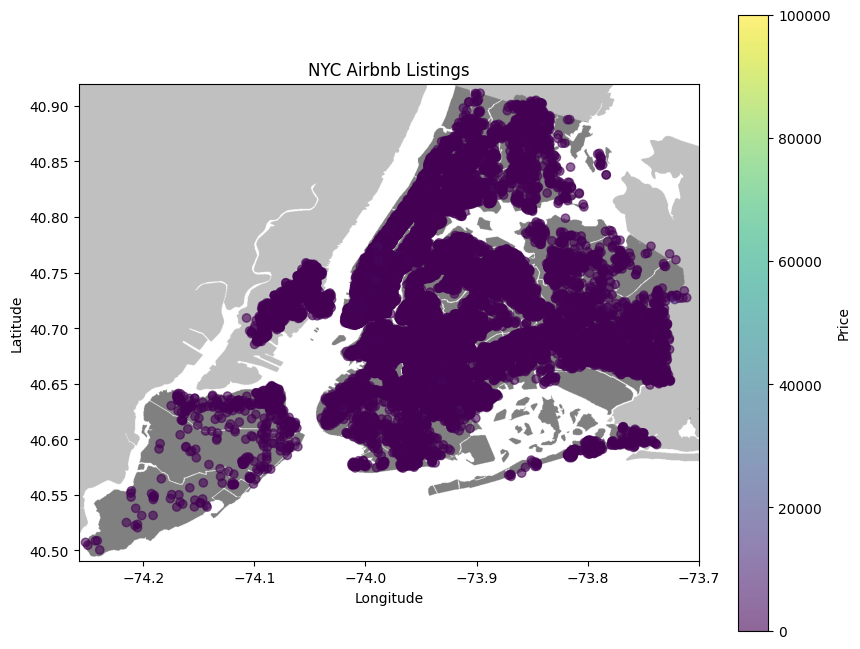

In [180]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas  as gpd

# Load your data into a DataFrame
df_nyc_clean = pd.read_csv('/Users/dhruvgulwani/Downloads/archive-2/AB_US_2023.csv')

# Define the bounding box coordinates for New York City
BBOX_NYC = [-74.258, -73.7, 40.49, 40.92]

# Load the map image
nyc_map_img = plt.imread('/Users/dhruvgulwani/Downloads/Neighbourhoods_New_York_City_Map.PNG')

# Plot the map with listings
plt.figure(figsize=(10, 8))
plt.imshow(nyc_map_img, zorder=0, extent=BBOX_NYC)
ax = plt.gca()

# Scatter plot for listings
scatter = ax.scatter(df_nyc_clean['longitude'], df_nyc_clean['latitude'], 
                     c=df_nyc_clean['price'], cmap='viridis', alpha=0.6, zorder=5)

# Colorbar
plt.colorbar(scatter, ax=ax, label='Price')

# Set axis limits to match the map
ax.set_xlim(BBOX_NYC[0], BBOX_NYC[1])
ax.set_ylim(BBOX_NYC[2], BBOX_NYC[3])

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Airbnb Listings')

plt.show()



In [181]:
#host analysis and densityb decrease 

In [182]:
#availability 
df_nyc_clean['availability_365'].value_counts()

availability_365
0      36947
365    11517
364     6672
89      2174
90      2000
       ...  
192      193
201      190
191      187
189      187
194      181
Name: count, Length: 366, dtype: int64

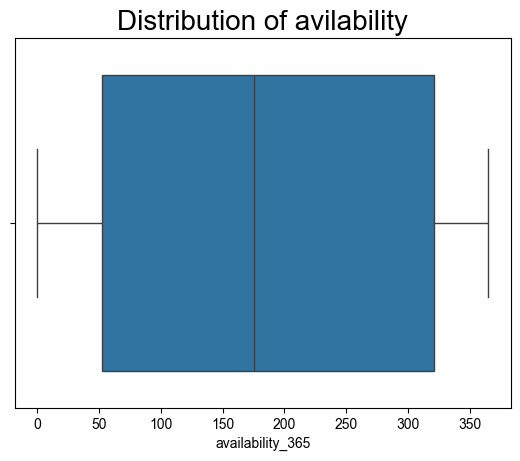

In [183]:
sns.boxplot(x=df_nyc_clean['availability_365']).set_title('Distribution of avilability', fontsize = 20)
sns.set(rc = {'figure.figsize':(15,8)})

<Axes: >

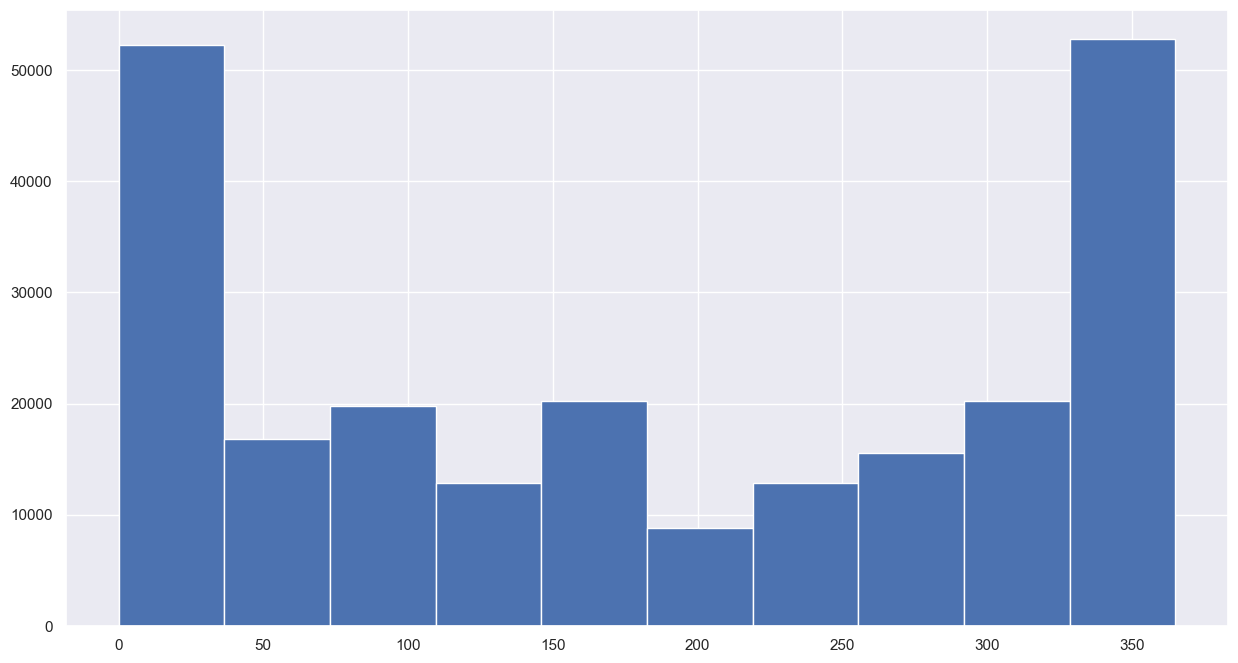

In [189]:
df_nyc_clean.availability_365.hist()

In [192]:
# Assuming df_nyc_clean is your DataFrame containing the 'availability_365' column

# Filter the dataframe to include only rows where 'availability_365' is greater than 0
df_filtered = df_nyc_clean[df_nyc_clean['availability_365'] > 0]

# Select only numeric columns for the correlation matrix
numeric_df = df_filtered.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric dataframe
corr = numeric_df.corr()


# Set the figure size for the heatmap
plt.figure(figsize=(15, 8))

# Create the heatmap using the correlation matrix, with annotations and the YlGnBu color map
sns.heatmap(corr, cmap="YlGnBu", annot=True)

# Set the title of the heatmap
plt.title('Heatmap of Numeric Features Correlation for Listings with Availability', fontsize=20)

# Show the plot
plt.show()


                                      id   host_id  latitude  longitude  \
id                              1.000000  0.380272 -0.048171   0.015806   
host_id                         0.380272  1.000000 -0.050284   0.048841   
latitude                       -0.048171 -0.050284  1.000000   0.073785   
longitude                       0.015806  0.048841  0.073785   1.000000   
price                           0.012961  0.012403 -0.041552  -0.019560   
minimum_nights                 -0.056381 -0.081256  0.064692  -0.024243   
number_of_reviews              -0.367726 -0.214922  0.048240  -0.034868   
reviews_per_month               0.082137  0.094587  0.014616  -0.007446   
calculated_host_listings_count  0.102467  0.002185  0.010429  -0.048789   
availability_365                0.123682  0.097757 -0.054933  -0.007900   
number_of_reviews_ltm          -0.241231 -0.047839  0.028373   0.006465   

                                   price  minimum_nights  number_of_reviews  \
id                  

'\n# Set the figure size for the heatmap\nplt.figure(figsize=(15, 8))\n\n# Create the heatmap using the correlation matrix, with annotations and the YlGnBu color map\nsns.heatmap(corr, cmap="YlGnBu", annot=True)\n\n# Set the title of the heatmap\nplt.title(\'Heatmap of Numeric Features Correlation for Listings with Availability\', fontsize=20)\n\n# Show the plot\nplt.show()\n'

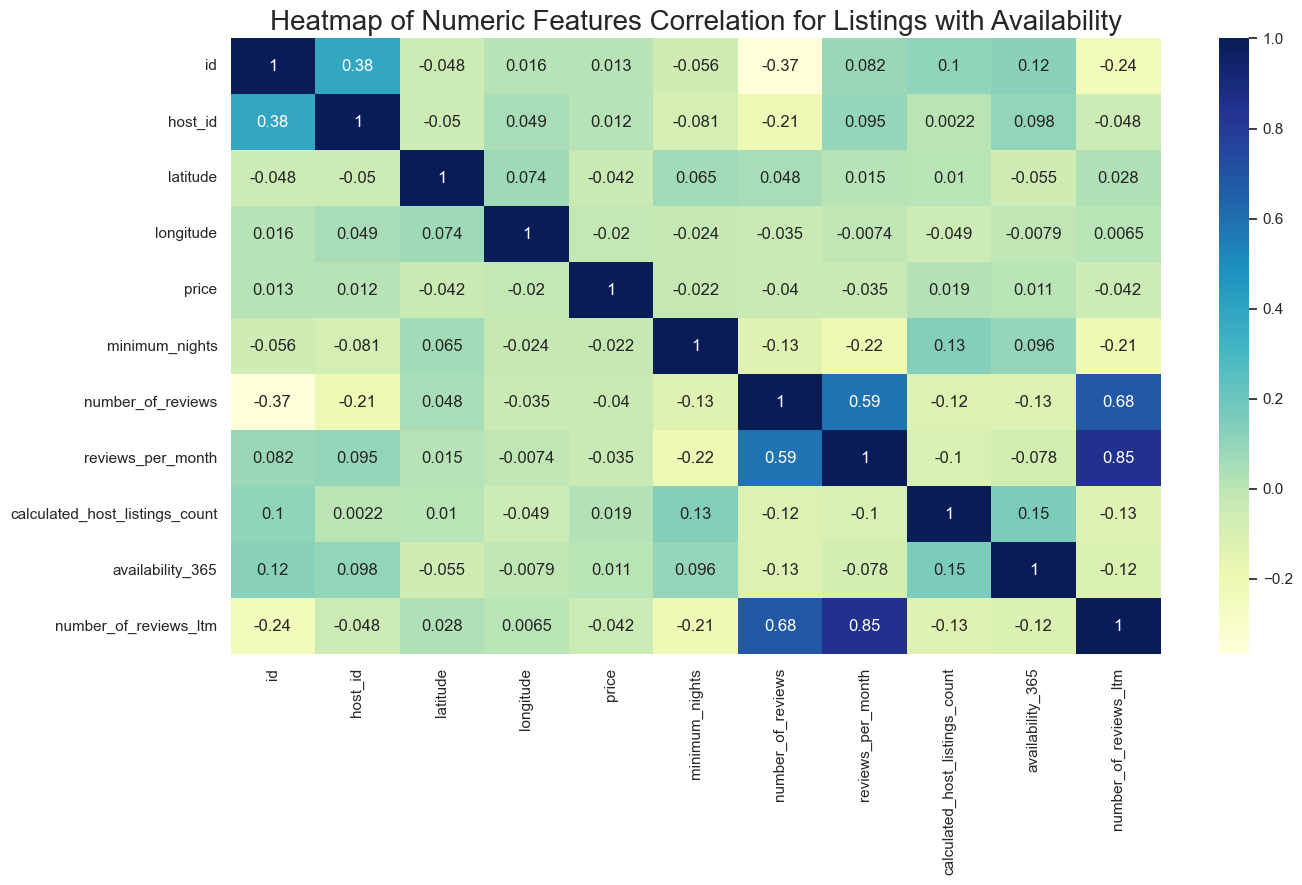

In [193]:
# Assuming df_nyc_clean is your DataFrame containing the 'availability_365' column

# Filter the dataframe to include only rows where 'availability_365' is greater than 0
df_filtered = df_nyc_clean[df_nyc_clean['availability_365'] > 0]

# Select only numeric columns for the correlation matrix
numeric_df = df_filtered.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric dataframe
corr = numeric_df.corr()


# Set the figure size for the heatmap
plt.figure(figsize=(15, 8))

# Create the heatmap using the correlation matrix, with annotations and the YlGnBu color map
sns.heatmap(corr, cmap="YlGnBu", annot=True)

# Set the title of the heatmap
plt.title('Heatmap of Numeric Features Correlation for Listings with Availability', fontsize=20)

# Show the plot
plt.show()
